In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
alpaca_api_key = "PKGC1VSZO33ZTWIONX5I"
alpaca_secret_key = "Vy8sEvLiXCaCjfziEZR5rX2vivmcNENJNB1rw2qU"
alpaca_end_point = "https://paper-api.alpaca.markets"



api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
    

In [3]:
ticker = ["SPY"]
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for SPY
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [4]:
sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

[                              open    high     low     close     volume  \
 timestamp                                                                 
 2016-01-04 05:00:00+00:00  200.490  201.03  198.59  201.0192  222353534   
 2016-01-05 05:00:00+00:00  201.405  201.90  200.05  201.3600  110845729   
 2016-01-06 05:00:00+00:00  198.330  200.06  197.60  198.8200  152112604   
 2016-01-07 05:00:00+00:00  195.330  197.44  193.59  194.0500  213436023   
 2016-01-08 05:00:00+00:00  195.190  195.85  191.58  191.9230  209567228   
 ...                            ...     ...     ...       ...        ...   
 2022-12-23 05:00:00+00:00  379.650  383.06  378.03  382.9100   58757557   
 2022-12-27 05:00:00+00:00  382.790  383.15  379.65  381.4000   51494435   
 2022-12-28 05:00:00+00:00  381.330  383.39  376.42  376.6600   70660057   
 2022-12-29 05:00:00+00:00  379.630  384.35  379.08  383.4400   64517045   
 2022-12-30 05:00:00+00:00  380.640  382.58  378.43  382.4300   83474793   
 
          

In [5]:
ticker_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,200.490,201.03,198.59,201.0192,222353534,655482,200.645153,SPY
2016-01-05 05:00:00+00:00,201.405,201.90,200.05,201.3600,110845729,418705,201.079710,SPY
2016-01-06 05:00:00+00:00,198.330,200.06,197.60,198.8200,152112604,548381,198.958712,SPY
2016-01-07 05:00:00+00:00,195.330,197.44,193.59,194.0500,213436023,796441,195.345235,SPY
2016-01-08 05:00:00+00:00,195.190,195.85,191.58,191.9230,209567228,754911,193.646639,SPY


<AxesSubplot:xlabel='timestamp'>

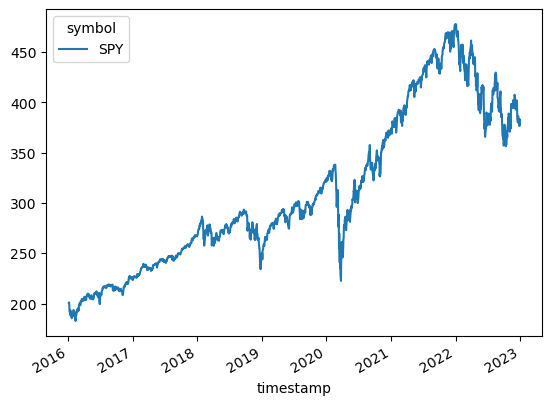

In [6]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

In [7]:
df_return=df_return.pct_change()
df_return.pct_change()
df_return

symbol,SPY
timestamp,
2016-01-04 05:00:00+00:00,NaN
2016-01-05 05:00:00+00:00,0.001695
2016-01-06 05:00:00+00:00,-0.012614
2016-01-07 05:00:00+00:00,-0.023992
2016-01-08 05:00:00+00:00,-0.010961
...,...
2022-12-23 05:00:00+00:00,0.005752
2022-12-27 05:00:00+00:00,-0.003943
2022-12-28 05:00:00+00:00,-0.012428


<AxesSubplot:xlabel='timestamp'>

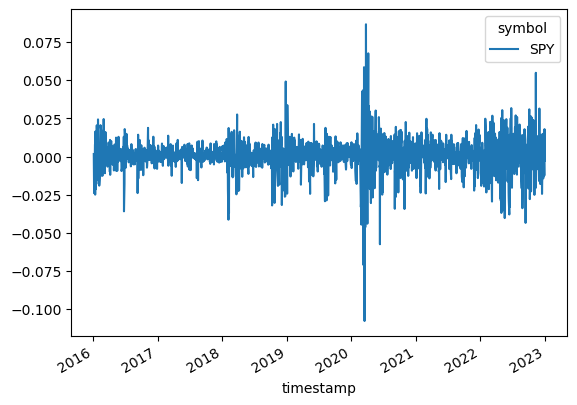

In [8]:
df_return.plot()

In [9]:
ticker_data_sim = pd.concat(sim, axis=1, keys=ticker)
ticker_data_sim.head()

SPY                                       \
                              open    high     low     close     volume   
timestamp                                                                 
2016-01-04 05:00:00+00:00  200.490  201.03  198.59  201.0192  222353534   
2016-01-05 05:00:00+00:00  201.405  201.90  200.05  201.3600  110845729   
2016-01-06 05:00:00+00:00  198.330  200.06  197.60  198.8200  152112604   
2016-01-07 05:00:00+00:00  195.330  197.44  193.59  194.0500  213436023   
2016-01-08 05:00:00+00:00  195.190  195.85  191.58  191.9230  209567228   

                                                   
                          trade_count        vwap  
timestamp                                          
2016-01-04 05:00:00+00:00      655482  200.645153  
2016-01-05 05:00:00+00:00      418705  201.079710  
2016-01-06 05:00:00+00:00      548381  198.958712  
2016-01-07 05:00:00+00:00      796441  195.345235  
2016-01-08 05:00:00+00:00      754911  193.646639

In [10]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [11]:
num_sims = 1000
MC_SPY = MCSimulation(
    portfolio_data = ticker_data_sim,
    num_simulation = 500,
    num_trading_days = 252*7
)

In [12]:
MC_SPY.portfolio_data.head()

SPY                                       \
                              open    high     low     close     volume   
timestamp                                                                 
2016-01-04 05:00:00+00:00  200.490  201.03  198.59  201.0192  222353534   
2016-01-05 05:00:00+00:00  201.405  201.90  200.05  201.3600  110845729   
2016-01-06 05:00:00+00:00  198.330  200.06  197.60  198.8200  152112604   
2016-01-07 05:00:00+00:00  195.330  197.44  193.59  194.0500  213436023   
2016-01-08 05:00:00+00:00  195.190  195.85  191.58  191.9230  209567228   

                                                                
                          trade_count        vwap daily_return  
timestamp                                                       
2016-01-04 05:00:00+00:00      655482  200.645153          NaN  
2016-01-05 05:00:00+00:00      418705  201.079710     0.001695  
2016-01-06 05:00:00+00:00      548381  198.958712    -0.012614  
2016-01-07 05:00:00+00:00      796441  195.345235    -0.023992  
2016-01-08 05:00:00+00:00      754911  193.646639    -0.010961

In [13]:
MC_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sakes\UM_FinTech_BC_Project_1_G2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013136,0.992092,1.001922,1.014561,1.005906,1.003984,0.979765,1.017814,0.995239,1.007890,...,1.008963,1.004465,1.008514,0.991124,0.989147,0.992287,1.020477,0.996511,1.011995,0.982002
2,1.005296,0.983053,0.995967,1.015850,1.020813,1.007756,0.962548,1.017820,0.988583,1.038275,...,1.006167,0.995996,1.011737,0.977549,0.988391,0.989213,0.996672,0.995777,1.030271,0.998402
3,1.020561,0.978774,1.018693,1.001896,1.012130,1.003626,0.973865,1.019116,0.978606,1.039957,...,0.987996,0.991064,0.999105,0.960733,0.999818,0.977299,0.993429,1.005932,1.044414,1.009498
4,1.036024,0.985092,1.009164,0.989668,0.996866,0.997773,0.966899,1.023028,0.971499,1.027962,...,0.991320,0.996249,0.995640,0.955598,1.002900,0.978836,0.994483,1.004536,1.058527,1.022434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2.032196,2.390156,1.436029,1.267617,3.017091,2.077628,1.604625,1.673705,3.092791,2.799992,...,2.219810,2.913979,1.763344,2.477215,3.503761,0.620119,1.972235,2.270430,4.376829,1.357808
1761,2.081980,2.451314,1.433216,1.272346,3.049532,2.140898,1.597722,1.657978,3.040417,2.821815,...,2.174888,2.846194,1.726336,2.477030,3.516163,0.625938,1.948693,2.311415,4.459858,1.379281
1762,2.059162,2.407686,1.454297,1.285397,3.032462,2.118797,1.590805,1.645703,2.988374,2.831133,...,2.178567,2.793146,1.712099,2.500078,3.550503,0.617229,1.946471,2.304218,4.386933,1.387618
1763,2.074971,2.447263,1.447458,1.273466,3.049555,2.154295,1.606690,1.646301,2.967985,2.861024,...,2.164401,2.740142,1.707470,2.492269,3.566456,0.616348,1.945440,2.347799,4.475795,1.394941


In [14]:
simulated_returns_data = {
    "mean": list(MC_SPY.simulated_return.mean(axis=1)),
    "median": list(MC_SPY.simulated_return.median(axis=1)),
    "min": list(MC_SPY.simulated_return.min(axis=1)),
    "max": list(MC_SPY.simulated_return.max(axis=1))
}


df_simulated_returns = pd.DataFrame(simulated_returns_data)


df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000295,1.000434,0.964973,1.038478
2,1.001729,1.001224,0.957145,1.051210
3,1.002025,1.002739,0.943820,1.063378
4,1.001813,1.001081,0.929219,1.085586


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of SPY Stock Over the past Seven Years'}>

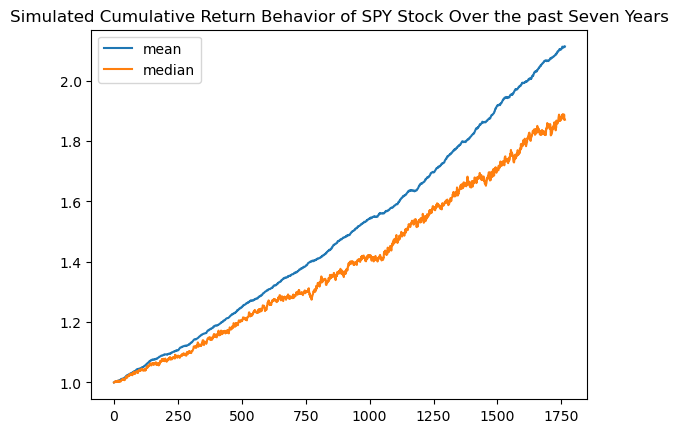

In [15]:
df_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of SPY Stock Over the past Seven Years")

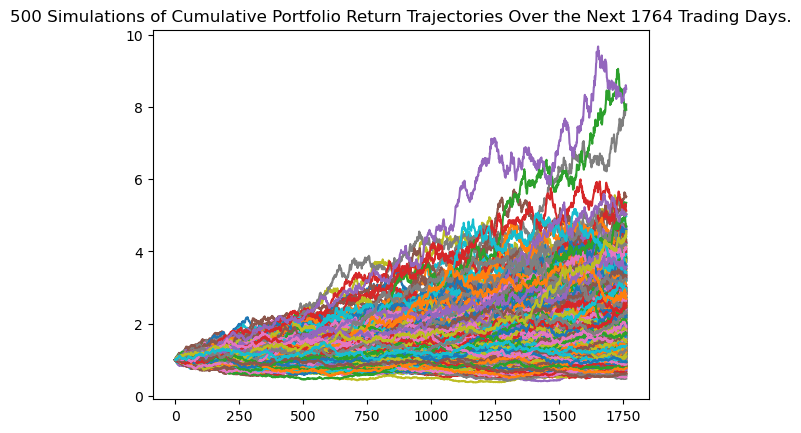

In [16]:
line_plot = MC_SPY.plot_simulation()

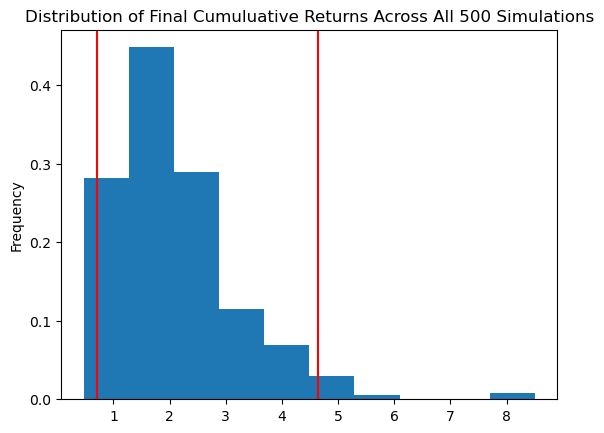

In [17]:
dist_plot = MC_SPY.plot_distribution()

In [18]:
summary_tbl = MC_SPY.summarize_cumulative_return()

In [40]:
ticker = ["XLK","XLV","XLI","XLC","XLY", "XLP","XLE","XLF","XLB","XLRE", "XLU"]

timeframe = "1Day"


start_date = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-10", tz="America/New_York").isoformat()


ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [41]:
sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim

[                             open      high      low   close    volume  \
 timestamp                                                                
 2016-01-04 05:00:00+00:00   42.06   42.2800   41.610   42.27  21638628   
 2016-01-05 05:00:00+00:00   42.40   42.5000   41.970   42.16  16067215   
 2016-01-06 05:00:00+00:00   41.54   41.9150   41.385   41.64  13858365   
 2016-01-07 05:00:00+00:00   40.79   41.3162   40.390   40.41  16840659   
 2016-01-08 05:00:00+00:00   40.76   40.8950   40.040   40.09  19233104   
 ...                           ...       ...      ...     ...       ...   
 2023-05-04 04:00:00+00:00  147.66  148.5400  146.930  147.54   5430455   
 2023-05-05 04:00:00+00:00  148.97  151.7400  148.760  151.24   5741516   
 2023-05-08 04:00:00+00:00  150.95  151.2900  150.230  151.16   3397843   
 2023-05-09 04:00:00+00:00  150.33  150.6100  149.840  150.00   6006368   
 2023-05-10 04:00:00+00:00  151.31  152.1800  150.360  151.83   4711240   
 
                       

In [42]:
ticker_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,42.72,42.860,42.255,42.74,14430190,45774,42.588863,XLB
2016-01-05 05:00:00+00:00,42.92,42.920,42.400,42.72,9498958,34428,42.664281,XLB
2016-01-06 05:00:00+00:00,42.14,42.180,41.365,41.60,9307382,39628,41.709904,XLB
2016-01-07 05:00:00+00:00,40.84,41.245,40.250,40.47,12579674,50396,40.822059,XLB
2016-01-08 05:00:00+00:00,40.86,40.900,39.950,40.06,8700176,42116,40.498787,XLB


<AxesSubplot:xlabel='timestamp'>

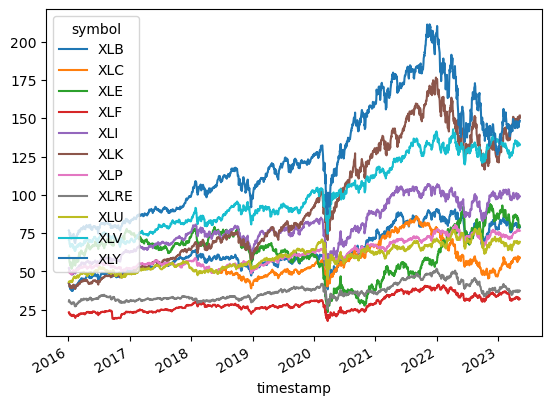

In [43]:
df_return = ticker_data[["close","symbol"]]
df_return = df_return.pivot(columns='symbol', values='close')
df_return.plot()

In [44]:
df_return=df_return.pct_change()
df_return.pct_change()
df_return

symbol,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
timestamp,,,,,,,,,,,
2016-01-04 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 05:00:00+00:00,-0.000468,NaN,0.003814,0.003851,0.002677,-0.002602,0.006419,0.030302,0.007178,0.004807,-0.001302
2016-01-06 05:00:00+00:00,-0.026217,NaN,-0.038493,-0.015345,-0.015446,-0.012334,-0.003388,-0.009655,-0.001839,-0.008161,-0.009776
2016-01-07 05:00:00+00:00,-0.027163,NaN,-0.024399,-0.028139,-0.027116,-0.029539,-0.012000,-0.018340,-0.006679,-0.020287,-0.020534
2016-01-08 05:00:00+00:00,-0.010131,NaN,-0.012857,-0.015590,-0.010153,-0.007919,-0.007692,-0.013110,-0.000464,-0.015059,-0.010751
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04 04:00:00+00:00,-0.006468,-0.016055,-0.011141,-0.012829,-0.010897,-0.004789,-0.002478,0.009307,0.007639,-0.007942,-0.007703
2023-05-05 04:00:00+00:00,0.016850,0.012498,0.027141,0.024723,0.015097,0.025078,0.009285,0.015460,0.006415,0.008988,0.020240
2023-05-08 04:00:00+00:00,-0.003264,0.010115,0.000000,0.001547,-0.003618,-0.000529,-0.002980,-0.006944,-0.003042,-0.002171,0.003397


In [45]:
num_sims = 1000
MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU = MCSimulation(
    portfolio_data = ticker_data_sim,
    num_simulation = 500,
    num_trading_days = 252*7
)

In [34]:

MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\sakes\UM_FinTech_BC_Project_1_G2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000196,0.997620,1.002591,0.997324,1.010503,1.006402,1.009602,1.015832,0.986936,0.988087,...,1.007434,1.007112,0.998077,0.999052,0.993428,0.992547,1.001465,1.003221,1.010579,1.031883
2,0.979409,0.992252,1.006075,0.980863,1.028086,1.001607,1.009555,1.034531,0.979608,0.982990,...,1.020850,1.010768,0.994928,0.993475,0.994140,0.984242,0.997215,1.013099,1.025310,1.038242
3,1.004913,0.992285,1.022593,0.969022,1.021259,1.019670,1.021647,1.022481,0.961576,0.973233,...,1.037992,1.007689,0.981165,0.990156,0.991539,0.996715,0.988215,1.013701,1.032262,1.026321
4,0.998350,0.999397,1.015318,0.950567,0.996509,1.031773,1.018463,1.008744,0.957217,0.982348,...,1.052095,1.006428,0.989477,0.986519,1.014089,0.998759,0.985333,1.016074,1.034047,1.024625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,1.070620,1.046930,1.861410,3.488071,1.317580,2.328423,0.822449,2.513604,1.602065,2.091693,...,2.755060,2.342682,0.945156,1.149708,3.066279,1.712173,1.490804,2.179932,1.518304,1.125718
1761,1.055423,1.033658,1.866804,3.471194,1.337118,2.327087,0.834587,2.503977,1.594592,2.132758,...,2.733352,2.339646,0.956845,1.147593,3.014351,1.649735,1.514479,2.184044,1.504350,1.117864
1762,1.054058,1.029232,1.870573,3.496966,1.327566,2.327865,0.835633,2.452972,1.599068,2.169376,...,2.711835,2.358059,0.967576,1.143563,2.982961,1.654477,1.501895,2.222036,1.518310,1.125751
1763,1.054600,1.033630,1.857977,3.517923,1.311128,2.289625,0.838481,2.435233,1.583711,2.172981,...,2.757821,2.371508,0.972981,1.170170,2.955107,1.660647,1.524584,2.233029,1.503403,1.117340


In [35]:
simulated_returns_data = {
    "mean": list(MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.simulated_return.mean(axis=1)),
    "median": list(MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.simulated_return.median(axis=1)),
    "min": list(MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.simulated_return.min(axis=1)),
    "max": list(MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.simulated_return.max(axis=1))
}


df_simulated_returns = pd.DataFrame(simulated_returns_data)


df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000614,1.000694,0.969309,1.034797
2,1.001257,1.001227,0.947228,1.040492
3,1.001703,1.000406,0.942084,1.062761
4,1.001208,1.000944,0.936115,1.077780


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of SPY Sectors Stock Over the past Seven Years'}>

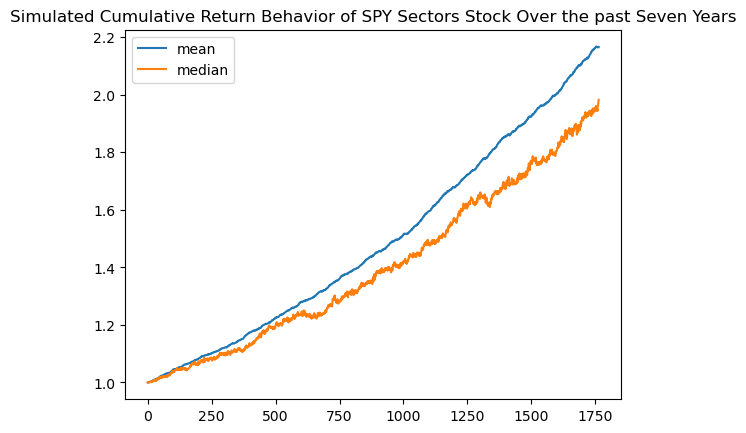

In [36]:
df_simulated_returns[['mean', 'median']].plot(title= "Simulated Cumulative Return Behavior of SPY Sectors Stock Over the past Seven Years")

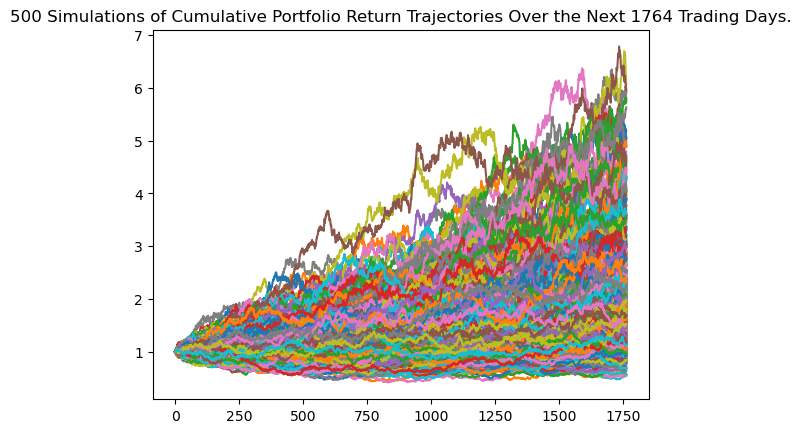

In [37]:
line_plot = MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.plot_simulation()

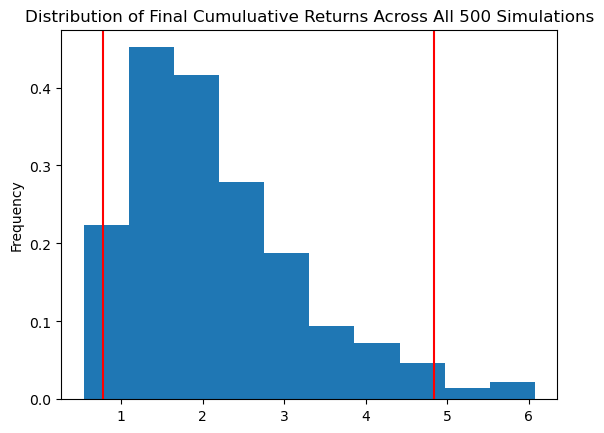

In [38]:
dist_plot = MC_XLK_XLV_XLI_XLC_XLY_XLP_XLE_XLF_XLB_XLRE_XLU.plot_distribution()

In [39]:
summary_tbl = MC_SPY.summarize_cumulative_return()
